In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
from sys import platform
import io
import datetime

In [2]:
# Data location
data_string = "/Users/erikamiller/Desktop/Pied Piper/Data/"
output_string = "/Users/erikamiller/Desktop/Pied Piper/Output/"

In [3]:
# Read file
try:
    df = pd.read_excel(
   io=data_string + "puyallup_chinook_2004-2018.xlsx",
   sheet_name ='2016',
    header = [3]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

pd.set_option('display.max_columns', None)
df.head()


,Date,Flow (cfs),In-Out for Day,Secchi Depth Day (cm),# of Fish Caught (Day),CE,Estimated Production Day (Day only CE average),In-Out for Night,Secchi Depth Night (cm),# of Fish Caught (Night),CE.1,Estimated Production Night,Average Secchi Depth (cm),Total fish captured,Estimated CE from Inv. SD model,Daily Production Estimates (Inv. Secchi),Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Date.1,Flow (cfs).1,Hours of Day,Secchi Depth Day (cm).1,# of Fish Caught (Day).1,CE.2,Estimated Production Day,Hours of Night,Secchi Depth Night (cm).1,# of Fish Caught (Night).1,CPUE (Night),CE.3,Estimated Production Night.1,Total Hours,Total Fish Captured
0,2016-02-05,2231.458333,-,204,-,NaN,NaN,1400-845,149,2,NaN,NaN,176.5,2.0,0.040396,49.510158,NaN,NaN,NaN,NaN,2016-02-05 00:00:00,NaN,-,204,0,NaN,NaN,1400-845,149,0.0,NaN,NaN,NaN,NaN,0.0
1,2016-02-06,2423.437500,930-1700,174,1,NaN,NaN,1715-830,109,1,NaN,NaN,141.5,2.0,0.041359,48.356643,NaN,NaN,NaN,NaN,2016-02-06 00:00:00,NaN,930-1700,174,0,NaN,NaN,1715-830,109,0.0,NaN,NaN,NaN,NaN,0.0
2,2016-02-07,2146.250000,900-1615,204,1,NaN,NaN,1630-730,208,0,NaN,NaN,206.0,1.0,0.039838,25.101747,NaN,NaN,NaN,NaN,2016-02-07 00:00:00,NaN,900-1615,204,0,NaN,NaN,1630-730,208,0.0,NaN,NaN,NaN,NaN,0.0
3,2016-02-08,2012.083333,745-1700,235,0,NaN,NaN,1715-745,231,0,NaN,NaN,233.0,0.0,0.039451,0.000000,NaN,NaN,NaN,NaN,2016-02-08 00:00:00,NaN,745-1700,235,0,NaN,NaN,1715-745,231,0.0,NaN,NaN,NaN,NaN,0.0
4,2016-02-09,2153.645833,-,-,0,NaN,NaN,800-815,214,0,NaN,NaN,214.0,0.0,0.039713,0.000000,NaN,NaN,NaN,NaN,2016-02-09 00:00:00,NaN,-,-,0,NaN,NaN,800-815,214,0.0,NaN,NaN,NaN,NaN,0.0


In [4]:
# Remove any trailing spaces
df.columns = df.columns.str.strip()

# List out columns
columns = list(df)

# Print the columns name as a list
print(columns)

['Date', 'Flow (cfs)', 'In-Out for Day', 'Secchi Depth Day (cm)', '# of Fish Caught (Day)', 'CE', 'Estimated Production Day (Day only CE average)', 'In-Out for Night', 'Secchi Depth Night (cm)', '# of Fish Caught (Night)', 'CE.1', 'Estimated Production Night', 'Average Secchi Depth (cm)', 'Total fish captured', 'Estimated CE from Inv. SD model', 'Daily Production Estimates (Inv. Secchi)', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Date.1', 'Flow (cfs).1', 'Hours    of       Day', 'Secchi Depth Day (cm).1', '# of Fish Caught (Day).1', 'CE.2', 'Estimated Production Day', 'Hours of  Night', 'Secchi Depth Night (cm).1', '# of Fish Caught (Night).1', 'CPUE (Night)', 'CE.3', 'Estimated Production Night.1', 'Total Hours', 'Total Fish Captured']


In [5]:
# Check for any unique values in the columns
df['In-Out for Day'].unique()
df['In-Out for Night'].unique()

array(['1400-845', '1715-830', '1630-730', '1715-745', '800-815',
       '1715-815', '1645-800', '1715-730', '1730-745', 'OUT', '1730-730',
       '2045-830', '1800-730', '1730-700', '1815-700', '1745-700',
       '1715-715', '1715-700', '1845-700', '1815-715', '1730-815',
       '1800-745', '1775-700', '1745-645', '1815-730', '1815-645',
       '1730-645', '1700-830', '1845-645', '1500-745', '1700-645',
       '1815-745', '1800-645', '1800-630', '1915-730', '1900-715',
       '1600-715', '1645-715', '1900-745', '1915-700', '1800-700',
       '1630-630', '1645-730', '1830-745', '1815-800', '1700-700',
       '1915-645', '1815-630', '1845-715', '1945-700', '2000-645',
       '2000-615', '1945-715', '1915-630', '2000-630', '1830-700',
       '2000-700', '2015-700', '1915-615', '1930-630', '1945-615',
       '1945-645', '2045-700', '2045-715', '715-630', '1945-630',
       '2045-600', '2015-730', '2000-600', '2000-745', '2030-630',
       '2045-645', '2015-800', '2030-715', '2045-730', '1

In [6]:
# Make a new column called 'In-Out for Day_edited' which is = to 'In-Out for Day' (same values)
df['In-Out for Day_edited'] = df['In-Out for Day']

# Where there are unique values in the 'In-Out for Day', replace the 'In-Out for Day_edited' with np.nan (=N/A) 
df['In-Out for Day_edited'][df['In-Out for Day'] == 'OUT'] = np.nan
##df['In-Out for Day_edited'][df['In-Out for Day'] == '-'] = np.nan ## Where there is a dash, treat as 24 hours -> Done in the 2nd next cell

# Check for any unique values in the columns
df['In-Out for Day_edited'].unique()

/var/folders/bx/0y_fwx6x0k33zy5f5rw2y4_r0000gn/T/ipykernel_11928/2592455880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['In-Out for Day_edited'][df['In-Out for Day'] == 'OUT'] = np.nan


array(['-', '930-1700', '900-1615', '745-1700', '830-1700', '830-1630',
       '830-1645', '745-1715', '800-1700', nan, '845-1730', '730-2000',
       '845-1700', '745-1730', '730-1800', '715-1700', '700-1715',
       '700-1700', '730-1700', '715-1800', '745-1800', '830-1745',
       '800-1800', '715-1750', '700-1800', '730-1745', '645-1730',
       '845-1830', '7-1845', '715-1815', '815-1800', '645-1900',
       '745-1845', '745-1545', '715-1645', '645-1845', '800-1900',
       '700-1830', '645-1745', '715-1630', '630-1645', '745-1815',
       '715-1900', '645-1830', '645-2045', '645-1930', '730-1730',
       '645-1800', '715-1845', '730-1815', '800-1930', '715-1945',
       '700-1945', '630-1930', '730-1900', '630-1830', '715-2000',
       '630-1945', '615-1945', '700-2030', '715-2030', '730-1945',
       '615-2000', '745-1945', '715-1930', '645-1945', '600-2000',
       '600-1945', '800-1830', '700-2015', '645-2030', '700-2000',
       '815-2015', '730-2030', '745-1500', '700-2115',

In [7]:
# Make a new column called 'In-Out for Night_edited' which is = to 'In-Out for Night' (same values)
df['In-Out for Night_edited'] = df['In-Out for Night']

# Where there are unique values in the 'In-Out for Night', replace the 'In-Out for Night_edited' with np.nan (=N/A) 
df['In-Out for Night_edited'][df['In-Out for Night'] == 'OUT'] = np.nan
df['In-Out for Night_edited'][df['In-Out for Night'] == '-'] = np.nan

# Check for any unique values in the columns
df['In-Out for Night_edited'].unique()

/var/folders/bx/0y_fwx6x0k33zy5f5rw2y4_r0000gn/T/ipykernel_11928/2994070838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['In-Out for Night_edited'][df['In-Out for Night'] == 'OUT'] = np.nan
/var/folders/bx/0y_fwx6x0k33zy5f5rw2y4_r0000gn/T/ipykernel_11928/2994070838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['In-Out for Night_edited'][df['In-Out for Night'] == '-'] = np.nan


array(['1400-845', '1715-830', '1630-730', '1715-745', '800-815',
       '1715-815', '1645-800', '1715-730', '1730-745', nan, '1730-730',
       '2045-830', '1800-730', '1730-700', '1815-700', '1745-700',
       '1715-715', '1715-700', '1845-700', '1815-715', '1730-815',
       '1800-745', '1775-700', '1745-645', '1815-730', '1815-645',
       '1730-645', '1700-830', '1845-645', '1500-745', '1700-645',
       '1815-745', '1800-645', '1800-630', '1915-730', '1900-715',
       '1600-715', '1645-715', '1900-745', '1915-700', '1800-700',
       '1630-630', '1645-730', '1830-745', '1815-800', '1700-700',
       '1915-645', '1815-630', '1845-715', '1945-700', '2000-645',
       '2000-615', '1945-715', '1915-630', '2000-630', '1830-700',
       '2000-700', '2015-700', '1915-615', '1930-630', '1945-615',
       '1945-645', '2045-700', '2045-715', '715-630', '1945-630',
       '2045-600', '2015-730', '2000-600', '2000-745', '2030-630',
       '2045-645', '2015-800', '2030-715', '2045-730', '150

In [8]:
# Where there is a '-' = 24 hours in the day_edited, replace with np.nan (=N/A) in day & night_edited column
df.loc[df['In-Out for Day'] == '-', 'In-Out for Day_edited'] = np.nan
df.loc[df['In-Out for Day'] == '-', 'In-Out for Night_edited'] = np.nan

In [9]:
# Remove the last number(n) of rows... in this case only the last, so n = 2
df.drop(df.tail(2).index,inplace=True)

In [10]:
# Split 'In-Out' columns Into 'Time_in' & 'Time_out' for both day & night
df[['Time_in_day','Time_out_day']] = df['In-Out for Day_edited'].str.split('-',expand=True)
df[['Time_in_night','Time_out_night']] = df['In-Out for Night_edited'].str.split('-',expand=True)

In [11]:
# Format values into timestamp (datetime format)
df['Time_in_day'] = pd.to_datetime(df['Time_in_day'], format = '%H%M', errors='coerce').dt.time
df['Time_out_day'] = pd.to_datetime(df['Time_out_day'], format = '%H%M', errors='coerce').dt.time
df['Time_in_night'] = pd.to_datetime(df['Time_in_night'], format = '%H%M', errors='coerce').dt.time
df['Time_out_night'] = pd.to_datetime(df['Time_out_night'], format = '%H%M', errors='coerce').dt.time

In [12]:
# Combine dates with 'time_in' and 'time_out' for both day & night
df.loc[:,'Time_in_day'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time_in_day.astype(str), errors='coerce')
df.loc[:,'Time_out_day'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time_out_day.astype(str), errors='coerce')
df.loc[:,'Time_in_night'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time_in_night.astype(str), errors='coerce')
df.loc[:,'Time_out_night'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time_out_night.astype(str), errors='coerce')

/var/folders/bx/0y_fwx6x0k33zy5f5rw2y4_r0000gn/T/ipykernel_11928/4149176380.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:,'Time_in_day'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time_in_day.astype(str), errors='coerce')
/var/folders/bx/0y_fwx6x0k33zy5f5rw2y4_r0000gn/T/ipykernel_11928/4149176380.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:,'Time_out_day'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time_out_day.astype(str), errors='coerce')
/var/folders/bx/0y_fwx6x0k33zy5f5rw2y4_r0000gn/T/ipykernel_11928/4149176380.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, p

In [13]:
# Offset the 'Time_out_night' column by 1 day
df['Time_out_night'] = df['Time_out_night'] + pd.DateOffset(days=1)

In [14]:
# Convert to datetime objects if they are not already
df['Time_in_day'] = pd.to_datetime(df['Time_in_day'])
df['Time_out_day'] = pd.to_datetime(df['Time_out_day'])
df['Time_in_night'] = pd.to_datetime(df['Time_in_night'])
df['Time_out_night'] = pd.to_datetime(df['Time_out_night'])


# Calculate the time difference and assign it to a new column 'In_day(hours)' & 'In_night(hours)
df['In_day(hours)'] = (df['Time_out_day'] - df['Time_in_day']).dt.total_seconds() / 3600
df['In_night(hours)'] = (df['Time_out_night'] - df['Time_in_night']).dt.total_seconds() / 3600


# Round the values in the 'In_day(hours)' column to 2 decimal places
df['In_day(hours)'] = df['In_day(hours)'].round(2)

In [15]:
# Make a new column with the total number of hours in
df['In_total(hours)'] = df['In_day(hours)'].fillna(0) + df['In_night(hours)'].fillna(0)

In [16]:
# Make a new columns with the same values as the other columns
df['chinook0_wild_num_day'] = df['# of Fish Caught (Day)']
df['chinook0_wild_num_night'] = df['# of Fish Caught (Night)']
df['chinook0_hatchery_num_day'] = df['# of Fish Caught (Day).1']
df['chinook0_hatchery_num_night'] = df['# of Fish Caught (Night).1']

In [17]:
# Replace values with np.nan (=N/A), where np.nan is present in the 'In_day(hours)'
## For wild (unmarked)
df.loc[pd.isna(df['In_day(hours)']), 'chinook0_wild_num_day'] = np.nan
df.loc[pd.isna(df['In_night(hours)']), 'chinook0_wild_num_night'] = np.nan

## For hatchery (marked)
df.loc[pd.isna(df['In_day(hours)']), 'chinook0_hatchery_num_day'] = np.nan
df.loc[pd.isna(df['In_night(hours)']), 'chinook0_hatchery_num_night'] = np.nan

In [18]:
# Calculate the total number of fish caught & assign it to a new column
df['chinook0_wild_num'] = df['chinook0_wild_num_day'].fillna(0) + df['chinook0_wild_num_night'].fillna(0)
df['chinook0_hatchery_num'] = df['chinook0_hatchery_num_day'].fillna(0) + df['chinook0_hatchery_num_night'].fillna(0)

In [19]:
# Rename columns
df.rename(columns = {
    'Flow (cfs)':'flow',
    'In_day(hours)':'In_day',
    'In_night(hours)':'In_night',
    'In_total(hours)':'In',
    'Estimated CE from Inv. SD model':'trap_efficiency',
    'Average Secchi Depth (cm)':'secchi_depth',
    'Secchi Depth Day (cm)':'secchi_depth_day',
    'Secchi Depth Night (cm)':'secchi_depth_night'

}, inplace = True)

In [20]:
# Split 'flow' into 2 new columns = 'flow_day' & 'flow_night'
df['flow_day'] = df['flow']
df['flow_night'] = df['flow']

In [21]:
# Where there is a '0' in the 'In' column, change it to np.nan (=N/A)
df['In'] = df['In'].replace(0, np.nan)



# Calculate CPUE (Catch Per Unit Effort)
    # For wild:
df['chinook0_wild_perhour_day'] = (df['chinook0_wild_num_day'] / df['In_day'])     
df['chinook0_wild_perhour_night'] = (df['chinook0_wild_num_night'] / df['In_night'])
df['chinook0_wild_perhour'] = (df['chinook0_wild_num'] / df['In'])

    # For hatchery:
df['chinook0_hatchery_perhour_day'] = (df['chinook0_hatchery_num_day'] / df['In_day'])     
df['chinook0_hatchery_perhour_night'] = (df['chinook0_hatchery_num_night'] / df['In_night'])
df['chinook0_hatchery_perhour'] = (df['chinook0_hatchery_num'] / df['In'])


In [22]:
# Calculate estimated CPUE (Catch Per Unit Effort)
    # For wild:
df['chinook0_wild_num_day_estimate'] = df['chinook0_wild_num_day'] / df['trap_efficiency']
df['chinook0_wild_num_night_estimate'] = df['chinook0_wild_num_night'] / df['trap_efficiency']

df['chinook0_wild_perhour_day_estimate'] = (df['chinook0_wild_perhour_day'] / df['trap_efficiency'])
df['chinook0_wild_perhour_night_estimate'] = (df['chinook0_wild_perhour_night'] / df['trap_efficiency'])
df['chinook0_wild_perhour_estimate'] = (df['chinook0_wild_perhour'] / df['trap_efficiency'])

    # For hatchery:
df['chinook0_hatchery_num_day_estimate'] = df['chinook0_hatchery_num_day'] / df['trap_efficiency']
df['chinook0_hatchery_num_night_estimate'] = df['chinook0_hatchery_num_night'] / df['trap_efficiency']

df['chinook0_hatchery_perhour_day_estimate'] = (df['chinook0_hatchery_perhour_day'] / df['trap_efficiency'])
df['chinook0_hatchery_perhour_night_estimate'] = (df['chinook0_hatchery_perhour_night'] / df['trap_efficiency'])
df['chinook0_hatchery_perhour_estimate'] = (df['chinook0_hatchery_perhour'] / df['trap_efficiency'])

In [23]:
# Calculate wild & hatchery perhour total
df['chinook0_wild_perhour_total'] = (df['chinook0_wild_perhour_day'] + df['chinook0_wild_perhour_night'])
df['chinook0_hatchery_perhour_total'] = (df['chinook0_hatchery_perhour_day'] + df['chinook0_hatchery_perhour_night'])


# Create 2 new data columns which are = np.nan 
df['chinook0_wild_day_fraction'] = np.nan
df['chinook0_hatchery_day_fraction'] = np.nan
n = len(df['chinook0_wild_perhour_total'])

for i in range(n):
    if df['chinook0_wild_perhour_day'].loc[i]==0 and df['chinook0_wild_perhour_total'].loc[i] == 0:
        df['chinook0_wild_day_fraction'].loc[i] = np.nan
        
    else:
        df['chinook0_wild_day_fraction'].loc[i] = (df['chinook0_wild_perhour_day'].loc[i] /
                                                          df['chinook0_wild_perhour_total'].loc[i])
        
    if df['chinook0_hatchery_perhour_day'].loc[i]==0 and df['chinook0_hatchery_perhour_total'].loc[i] == 0:
        df['chinook0_hatchery_day_fraction'].loc[i] = np.nan
        
    else:
        df['chinook0_hatchery_day_fraction'].loc[i] = (df['chinook0_hatchery_perhour_day'].loc[i] /
                                                         df['chinook0_hatchery_perhour_total'].loc[i])

/var/folders/bx/0y_fwx6x0k33zy5f5rw2y4_r0000gn/T/ipykernel_11928/2885639267.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chinook0_wild_day_fraction'].loc[i] = (df['chinook0_wild_perhour_day'].loc[i] /
/var/folders/bx/0y_fwx6x0k33zy5f5rw2y4_r0000gn/T/ipykernel_11928/2885639267.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chinook0_hatchery_day_fraction'].loc[i] = (df['chinook0_hatchery_perhour_day'].loc[i] /
/var/folders/bx/0y_fwx6x0k33zy5f5rw2y4_r0000gn/T/ipykernel_11928/2885639267.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [24]:
# Display all rows & columns of dataset
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,Date,flow,In-Out for Day,secchi_depth_day,# of Fish Caught (Day),CE,Estimated Production Day (Day only CE average),In-Out for Night,secchi_depth_night,# of Fish Caught (Night),CE.1,Estimated Production Night,secchi_depth,Total fish captured,trap_efficiency,Daily Production Estimates (Inv. Secchi),Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Date.1,Flow (cfs).1,Hours of Day,Secchi Depth Day (cm).1,# of Fish Caught (Day).1,CE.2,Estimated Production Day,Hours of Night,Secchi Depth Night (cm).1,# of Fish Caught (Night).1,CPUE (Night),CE.3,Estimated Production Night.1,Total Hours,Total Fish Captured,In-Out for Day_edited,In-Out for Night_edited,Time_in_day,Time_out_day,Time_in_night,Time_out_night,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_num_night,chinook0_hatchery_num_day,chinook0_hatchery_num_night,chinook0_wild_num,chinook0_hatchery_num,flow_day,flow_night,chinook0_wild_perhour_day,chinook0_wild_perhour_night,chinook0_wild_perhour,chinook0_hatchery_perhour_day,chinook0_hatchery_perhour_night,chinook0_hatchery_perhour,chinook0_wild_num_day_estimate,chinook0_wild_num_night_estimate,chinook0_wild_perhour_day_estimate,chinook0_wild_perhour_night_estimate,chinook0_wild_perhour_estimate,chinook0_hatchery_num_day_estimate,chinook0_hatchery_num_night_estimate,chinook0_hatchery_perhour_day_estimate,chinook0_hatchery_perhour_night_estimate,chinook0_hatchery_perhour_estimate,chinook0_wild_perhour_total,chinook0_hatchery_perhour_total,chinook0_wild_day_fraction,chinook0_hatchery_day_fraction
0,2016-02-05,2231.458333,-,204,-,NaN,NaN,1400-845,149,2,NaN,NaN,176.50,2.0,0.040396,49.510158,NaN,NaN,NaN,NaN,2016-02-05 00:00:00,NaN,-,204,0,NaN,NaN,1400-845,149,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2231.458333,2231.458333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-06,2423.437500,930-1700,174,1,NaN,NaN,1715-830,109,1,NaN,NaN,141.50,2.0,0.041359,48.356643,NaN,NaN,NaN,NaN,2016-02-06 00:00:00,NaN,930-1700,174,0,NaN,NaN,1715-830,109,0.0,NaN,NaN,NaN,NaN,0.0,930-1700,1715-830,2016-02-06 09:30:00,2016-02-06 17:00:00,2016-02-06 17:15:00,2016-02-07 08:30:00,7.50,15.25,22.75,1,1,0,0.0,2,0.0,2423.437500,2423.437500,0.133333,0.065574,0.087912,0.0,0.000000,0.000000,24.178322,24.178322,3.223776,1.585464,2.125567,0.0,0.000000,0.0,0.000000,0.000000,0.198907,0.0,0.670330,NaN
2,2016-02-07,2146.250000,900-1615,204,1,NaN,NaN,1630-730,208,0,NaN,NaN,206.00,1.0,0.039838,25.101747,NaN,NaN,NaN,NaN,2016-02-07 00:00:00,NaN,900-1615,204,0,NaN,NaN,1630-730,208,0.0,NaN,NaN,NaN,NaN,0.0,900-1615,1630-730,2016-02-07 09:00:00,2016-02-07 16:15:00,2016-02-07 16:30:00,2016-02-08 07:30:00,7.25,15.00,22.25,1,0,0,0.0,1,0.0,2146.250000,2146.250000,0.137931,0.0,0.044944,0.0,0.000000,0.000000,25.101747,0.0,3.46231,0.0,1.128168,0.0,0.000000,0.0,0.000000,0.000000,0.137931,0.0,1.000000,NaN
3,2016-02-08,2012.083333,745-1700,235,0,NaN,NaN,1715-745,231,0,NaN,NaN,233.00,0.0,0.039451,0.000000,NaN,NaN,NaN,NaN,2016-02-08 00:00:00,NaN,745-1700,235,0,NaN,NaN,1715-745,231,0.0,NaN,NaN,NaN,NaN,0.0,745-1700,1715-745,2016-02-08 07:45:00,2016-02-08 17:00:00,2016-02-08 17:15:00,2016-02-09 07:45:00,9.25,14.50,23.75,0,0,0,0.0,0,0.0,2012.083333,2012.083333,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN
4,2016-02-09,2153.645833,-,-,0,NaN,NaN,800-815,214,0,NaN,NaN,214.00,0.0,0.039713,0.000000,NaN,NaN,NaN,NaN,2016-02-09 00:00:00,NaN,-,-,0,NaN,NaN,800-815,214,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2153.645833,2153.645833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-02-10,2277.395833,830-1700,141,0,NaN,NaN,1715-815,95,1,NaN,NaN,118.00,1.0,0.042327,23.625516,NaN,NaN,NaN,NaN,2016-02-10 00:00:00,NaN,830-1700,141,0,NaN,NaN,1715-815,95,0.0,NaN,NaN,NaN,NaN,0.0,830-1700,1715-815,2016-02-10 08:30:00,2016-02-10 17:00:00,2016-02-10 17:15:00,2016-02-11 08:15:00,8.50,15.00,2

In [25]:
# Subset the data for easier viewing 
df_subset = df[['Date', 'flow', 'In_day', 'In_night', 'In',
                'chinook0_wild_num_day', 'chinook0_wild_perhour_day',
                'chinook0_wild_num_night', 'chinook0_wild_perhour_night',
                'chinook0_hatchery_num_day', 'chinook0_hatchery_perhour_day',
                'chinook0_hatchery_num_night', 'chinook0_hatchery_perhour_night',
                'chinook0_wild_num',
                'chinook0_wild_perhour', 
                'chinook0_hatchery_num',
                'chinook0_hatchery_perhour',
                'trap_efficiency',
                'chinook0_wild_num_day_estimate', 'chinook0_wild_num_night_estimate',
                'chinook0_wild_perhour_day_estimate', 'chinook0_wild_perhour_night_estimate', 'chinook0_wild_perhour_estimate',
                'chinook0_hatchery_num_day_estimate', 'chinook0_hatchery_num_night_estimate',
                'chinook0_hatchery_perhour_day_estimate', 'chinook0_hatchery_perhour_night_estimate', 'chinook0_hatchery_perhour_estimate',
                'chinook0_wild_day_fraction',
                'chinook0_hatchery_day_fraction',
                'flow_day', 'flow_night',
                'secchi_depth',
                'secchi_depth_day', 'secchi_depth_night']]



# Display all rows & columns of the subset
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_subset)

,Date,flow,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_perhour_day,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_wild_num,chinook0_wild_perhour,chinook0_hatchery_num,chinook0_hatchery_perhour,trap_efficiency,chinook0_wild_num_day_estimate,chinook0_wild_num_night_estimate,chinook0_wild_perhour_day_estimate,chinook0_wild_perhour_night_estimate,chinook0_wild_perhour_estimate,chinook0_hatchery_num_day_estimate,chinook0_hatchery_num_night_estimate,chinook0_hatchery_perhour_day_estimate,chinook0_hatchery_perhour_night_estimate,chinook0_hatchery_perhour_estimate,chinook0_wild_day_fraction,chinook0_hatchery_day_fraction,flow_day,flow_night,secchi_depth,secchi_depth_day,secchi_depth_night
0,2016-02-05,2231.458333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,0.040396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2231.458333,2231.458333,176.50,204,149
1,2016-02-06,2423.437500,7.50,15.25,22.75,1,0.133333,1,0.065574,0,0.0,0.0,0.000000,2,0.087912,0.0,0.000000,0.041359,24.178322,24.178322,3.223776,1.585464,2.125567,0.0,0.000000,0.0,0.000000,0.000000,0.670330,NaN,2423.437500,2423.437500,141.50,174,109
2,2016-02-07,2146.250000,7.25,15.00,22.25,1,0.137931,0,0.0,0,0.0,0.0,0.000000,1,0.044944,0.0,0.000000,0.039838,25.101747,0.0,3.46231,0.0,1.128168,0.0,0.000000,0.0,0.000000,0.000000,1.000000,NaN,2146.250000,2146.250000,206.00,204,208
3,2016-02-08,2012.083333,9.25,14.50,23.75,0,0.0,0,0.0,0,0.0,0.0,0.000000,0,0.000000,0.0,0.000000,0.039451,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN,2012.083333,2012.083333,233.00,235,231
4,2016-02-09,2153.645833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,0.039713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2153.645833,2153.645833,214.00,-,214
5,2016-02-10,2277.395833,8.50,15.00,23.50,0,0.0,1,0.066667,0,0.0,0.0,0.000000,1,0.042553,0.0,0.000000,0.042327,0.0,23.625516,0.0,1.575034,1.005341,0.0,0.000000,0.0,0.000000,0.000000,0.000000,NaN,2277.395833,2277.395833,118.00,141,95
6,2016-02-11,2149.895833,8.00,15.25,23.25,0,0.0,1,0.065574,0,0.0,0.0,0.000000,1,0.043011,0.0,0.000000,0.041556,0.0,24.063982,0.0,1.577966,1.035010,0.0,0.000000,0.0,0.000000,0.000000,0.000000,NaN,2149.895833,2149.895833,136.00,205,67
7,2016-02-12,3078.333333,8.25,14.25,22.50,3,0.363636,4,0.280702,0,0.0,0.0,0.000000,7,0.311111,0.0,0.000000,0.044183,67.899908,90.53321,8.230292,6.353208,7.041472,0.0,0.000000,0.0,0.000000,0.000000,0.564356,NaN,3078.333333,3078.333333,89.50,81,98
8,2016-02-13,3192.291667,9.50,14.25,23.75,1,0.105263,1,0.070175,0,0.0,0.0,0.000000,2,0.084211,0.0,0.000000,0.042808,23.359979,23.359979,2.458945,1.639297,1.967156,0.0,0.000000,0.0,0.000000,0.000000,0.600000,NaN,3192.291667,3192.291667,109.00,92,126
9,2016-02-14,3781.354167,9.00,NaN,9.00,0,0.0,NaN,NaN,0,0.0,NaN,NaN,0,0.000000,0.0,0.000000,0.048563,0.0,NaN,0.0,NaN,0.000000,0.0,NaN,0.0,NaN,0.000000,NaN,NaN,3781.354167,3781.354167,57.00,57,-


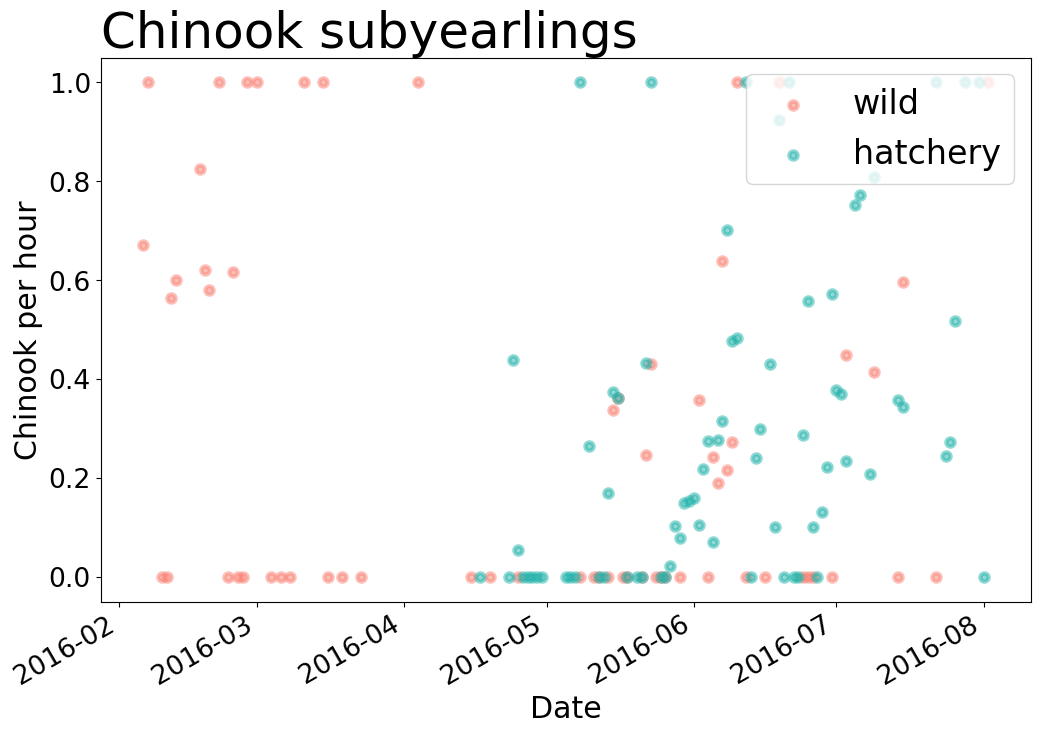

In [26]:
# Plotting all of them

fs=24
lw = 3
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)


ax1.scatter(
    df_subset['Date'], df_subset['chinook0_wild_day_fraction'], color = 'salmon', 
    label = 'wild', alpha = 0.5, linewidth = lw)


ax1.scatter(df_subset['Date'], df_subset['chinook0_hatchery_day_fraction'], color = 'lightseagreen', 
         label = 'hatchery', alpha = 0.5, linewidth = lw)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook subyearlings', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()


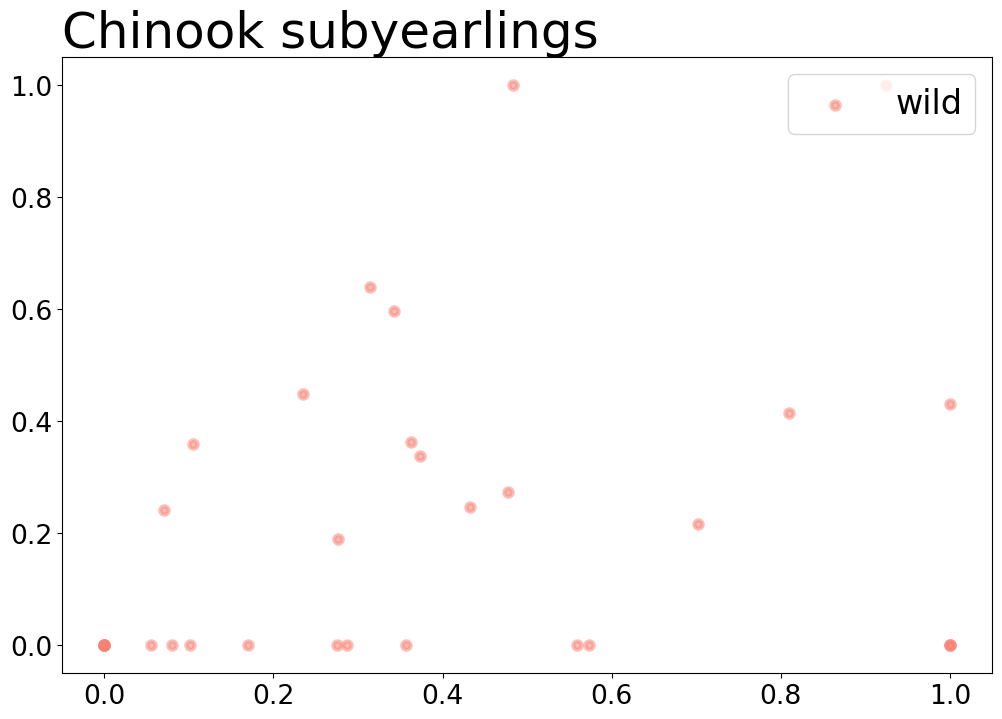

In [27]:
# Same plot but with only  wild fish

fs=24
lw = 3
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)


ax1.scatter(
    df_subset['chinook0_hatchery_day_fraction'], df_subset['chinook0_wild_day_fraction'], color = 'salmon', 
    label = 'wild', alpha = 0.5, linewidth = lw)


# ax1.scatter(df_subset['Date'], df_subset['chinook0_hatchery_day_fraction'], color = 'lightseagreen', 
#          label = 'hatchery', alpha = 0.5, linewidth = lw)

# plt.gcf().autofmt_xdate()
# plt.xlabel('Date', size = 0.9*fs)
# plt.ylabel('Chinook per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook subyearlings', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [28]:
#Save the data
df_subset.to_csv(output_string + "2016_puyallup.csv") 